<a href="https://colab.research.google.com/github/tanya-dora/EDA_BankChurn/blob/main/Bank_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
dataset = pd.read_csv('/content/Bank_Churn.csv')
dataset.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Summary Statistics

In [4]:
dataset.shape

(10000, 13)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


info() tells me that the dataset has no null values

In [6]:
dataset.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


# **Data Handling and Cleaning**

1. Checking for null or duplicate values

In [7]:
print(dataset.isnull().sum())
print(dataset.duplicated().sum())

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64
0


no null or duplicated values

2. Removing irrelevant columns

In [8]:
dataset.columns

Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited'],
      dtype='object')

In [9]:
dataset = dataset[['CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited']]


3. Converting categorical to numerical - Gender, Geography

In [10]:
dataset.replace(['Male', 'Female'], [0,1], inplace = True)

<ipython-input-10-2b4979723bc5>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset.replace(['Male', 'Female'], [0,1], inplace = True)
<ipython-input-10-2b4979723bc5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.replace(['Male', 'Female'], [0,1], inplace = True)


In [11]:
dummies = pd.get_dummies(dataset['Geography'], drop_first = True)
dummies.head()

,Germany,Spain
0,False,False
1,False,True
2,False,False
3,False,False
4,False,True


In [12]:
merged_dataset = pd.concat([dataset, dummies], axis = 1)
merged_dataset.drop('Geography', axis = 1, inplace = True)

In [36]:
merged_dataset.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Germany,Spain
0,619,1,42,2,0.00,1,1,1,101348.88,1,False,False
1,608,1,41,1,83807.86,1,0,1,112542.58,0,False,True
2,502,1,42,8,159660.80,3,1,0,113931.57,1,False,False
3,699,1,39,1,0.00,2,0,0,93826.63,0,False,False
4,850,1,43,2,125510.82,1,1,1,79084.10,0,False,True


4. Scale Values

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [37]:
continuous_columns = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
df_scaled = scaler.fit_transform(merged_dataset[continuous_columns])

In [38]:

#df_scaled = pd.DataFrame(df_scaled) column names are not given
df_scaled = pd.DataFrame(df_scaled, columns = continuous_columns)


In [39]:
df_non_continuous = merged_dataset.drop(columns=continuous_columns)
dataset_scaled = pd.concat([df_scaled, df_non_continuous], axis = 1)

In [18]:
dataset_scaled.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Gender,HasCrCard,IsActiveMember,Exited,Germany,Spain
0,0.538,0.324324,0.2,0.000000,0.000000,0.506735,1,1,1,1,False,False
1,0.516,0.310811,0.1,0.334031,0.000000,0.562709,1,0,1,0,False,True
2,0.304,0.324324,0.8,0.636357,0.666667,0.569654,1,1,0,1,False,False
3,0.698,0.283784,0.1,0.000000,0.333333,0.469120,1,0,0,0,False,False
4,1.000,0.337838,0.2,0.500246,0.000000,0.395400,1,1,1,0,False,True


# Univariate Analysis

In [27]:
import seaborn as sns

In [28]:
numeric_cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

In [44]:
#descriptive statistics of columns
merged_dataset[numeric_cols].describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,100090.239881
std,96.653299,10.487806,2.892174,62397.405202,0.581654,57510.492818
min,350.000000,18.000000,0.000000,0.000000,1.000000,11.580000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,51002.110000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,100193.915000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,149388.247500
max,850.000000,92.000000,10.000000,250898.090000,4.000000,199992.480000


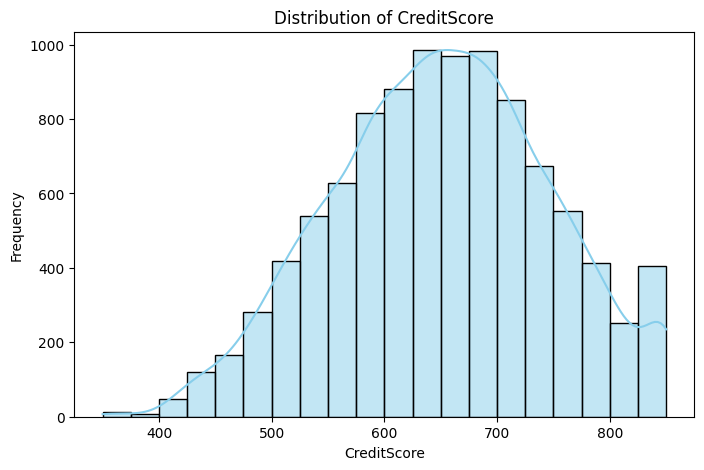

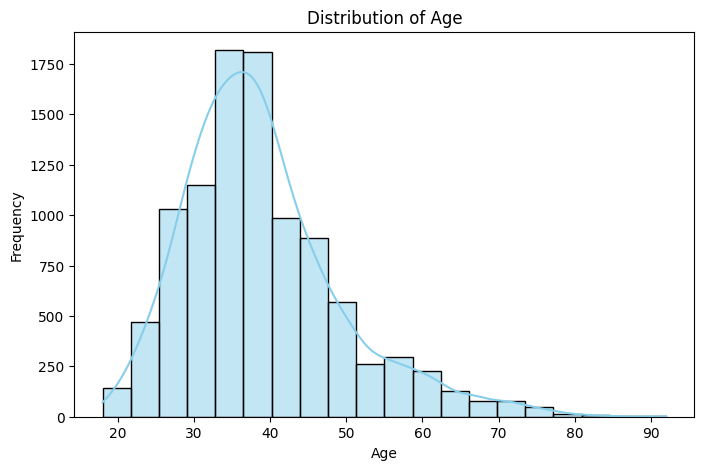

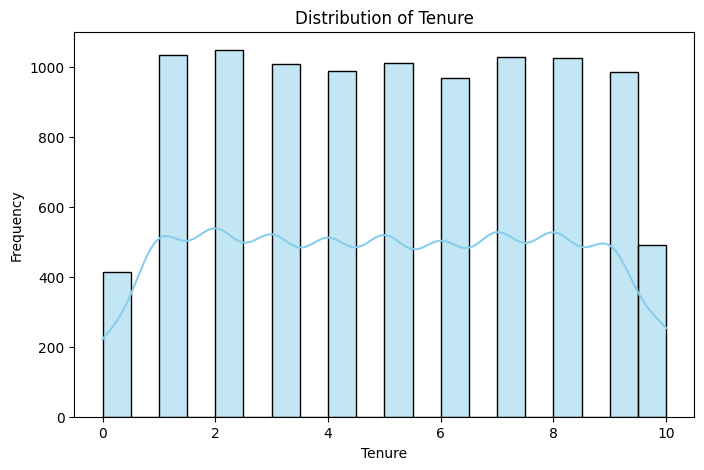

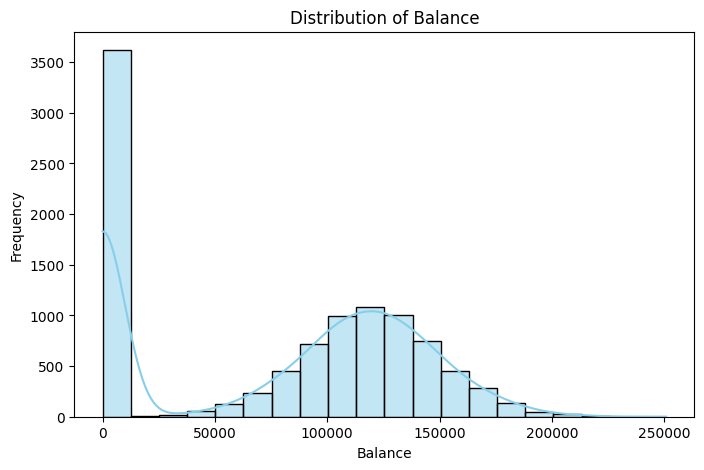

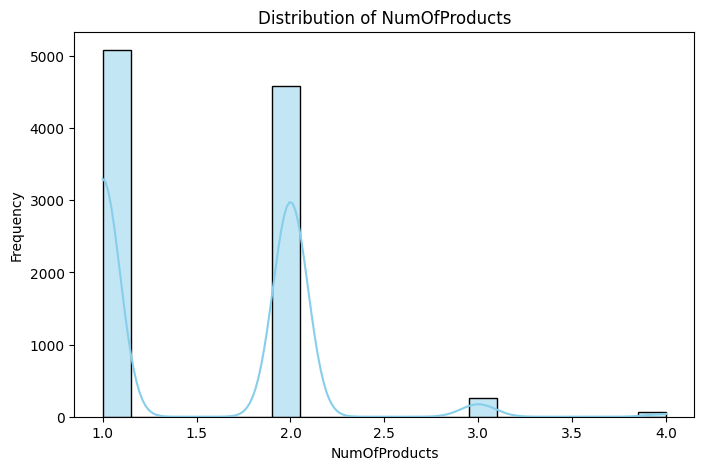

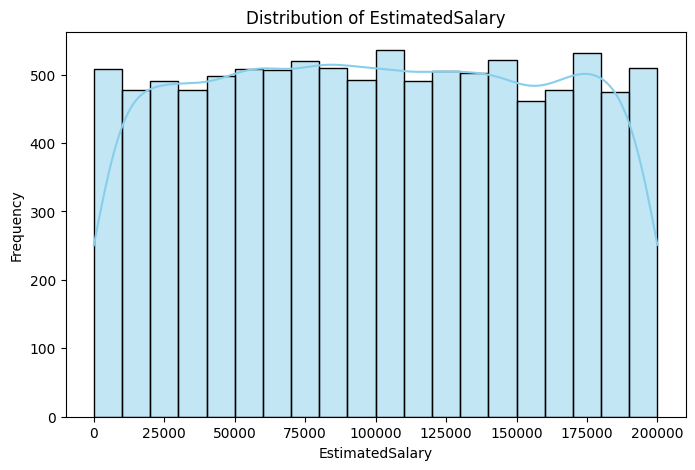

In [33]:
#histograms of numeric columns
for col in numeric_cols:
    plt.figure(figsize=(8, 5))
    sns.histplot(merged_dataset[col], bins=20, kde=True, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

<ipython-input-41-d7888e11eb0a>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=merged_dataset[col], palette='viridis')


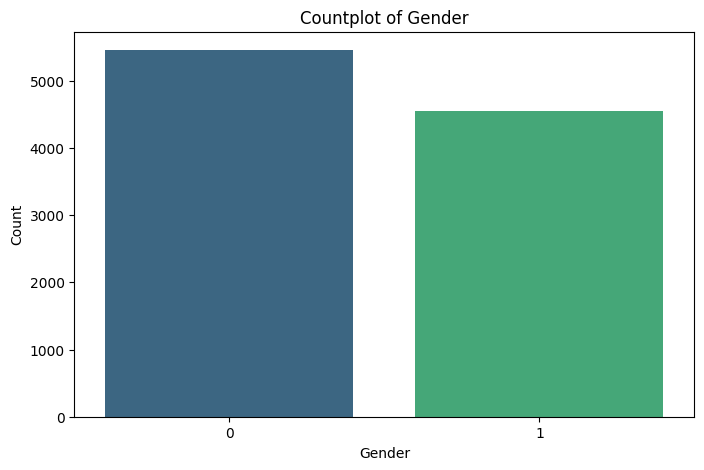

<ipython-input-41-d7888e11eb0a>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=merged_dataset[col], palette='viridis')


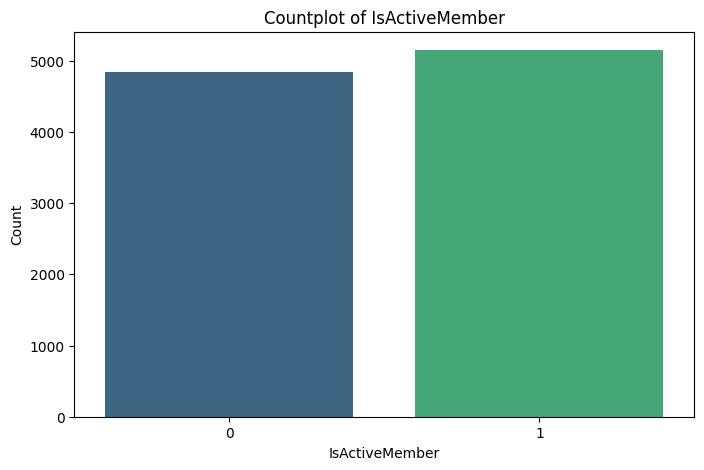

<ipython-input-41-d7888e11eb0a>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=merged_dataset[col], palette='viridis')


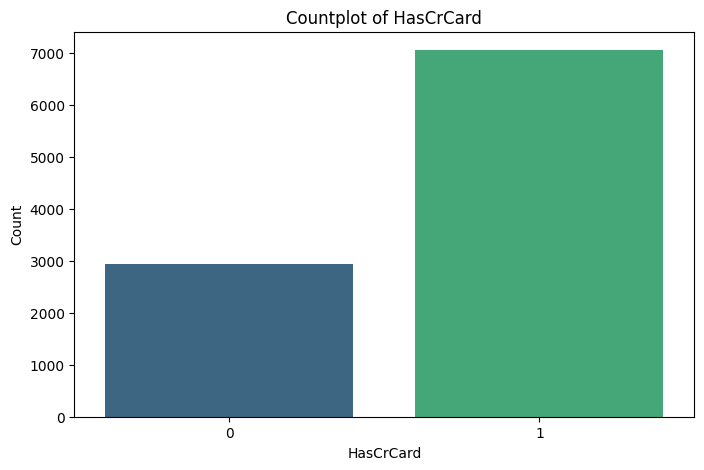

In [41]:
#countplot for categorical variables
categorical_cols = ['Gender', 'IsActiveMember', 'HasCrCard']
for col in categorical_cols:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=merged_dataset[col], palette='viridis')
    plt.title(f'Countplot of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

#Bivariate Analysis


In [59]:
#correlation matrix for numeric features
corr_matrix = dataset_scaled[numeric_cols].corr()
corr_matrix

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.001384
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.007201
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.007784
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,0.012797
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.014204
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,1.000000


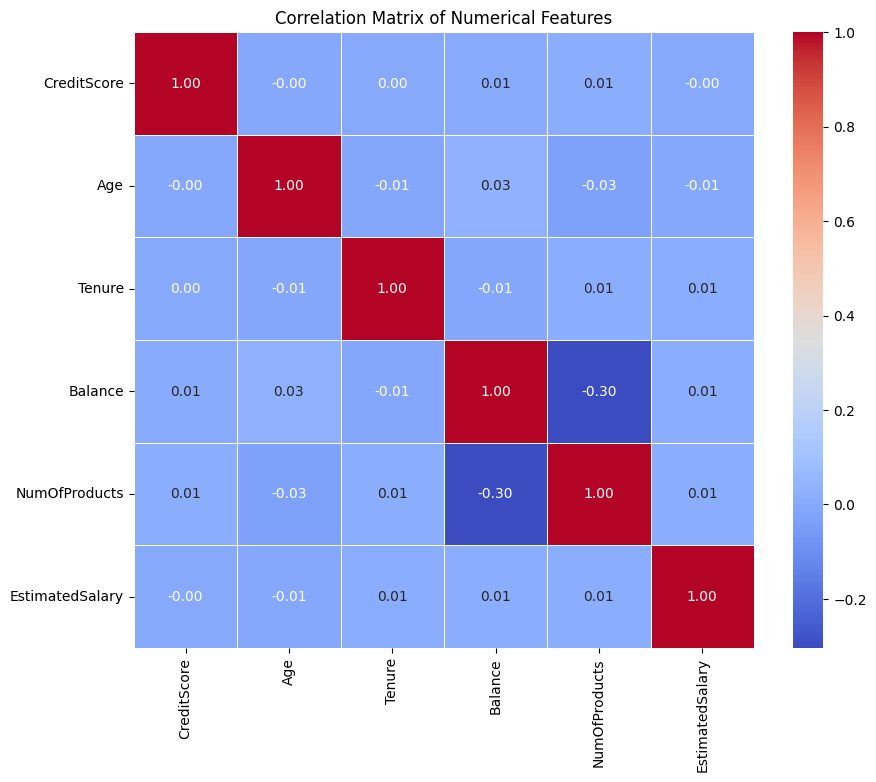

In [60]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

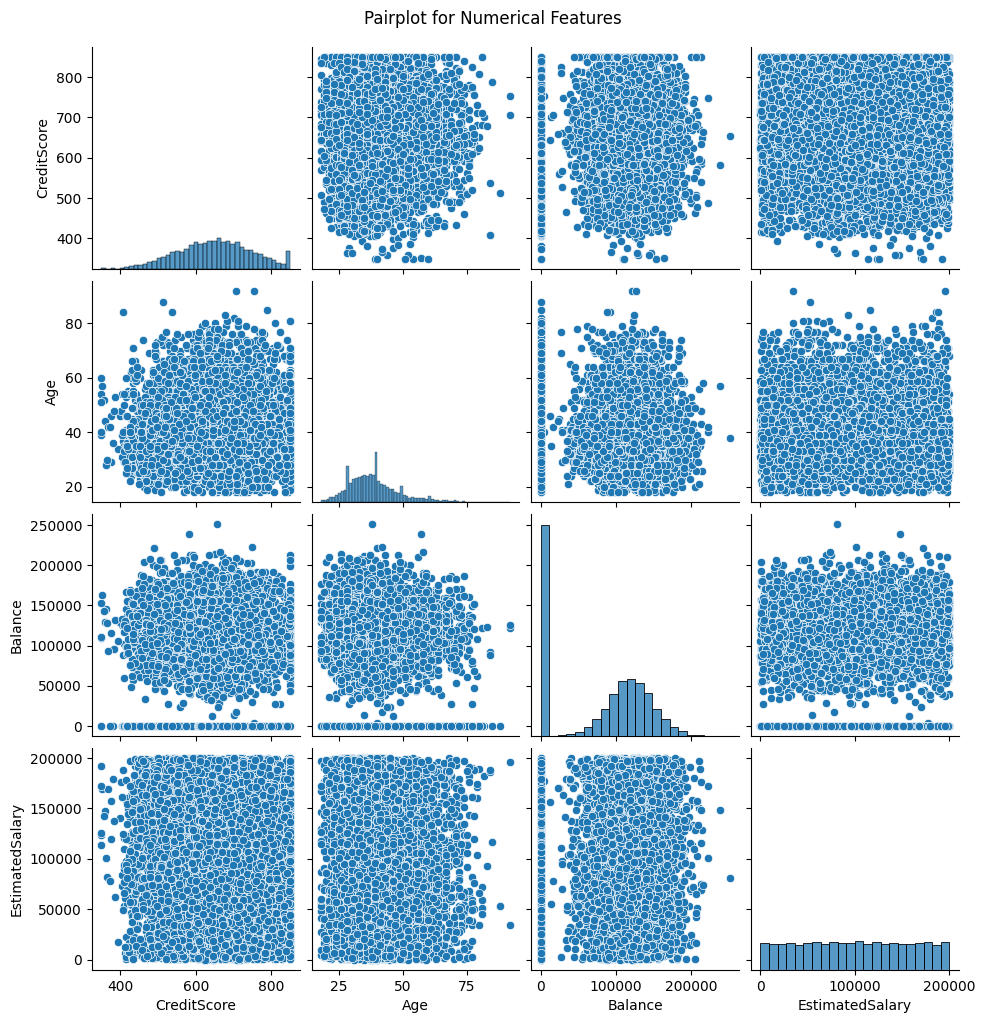

In [54]:
#pairwise plot
sns.pairplot(merged_dataset[['CreditScore', 'Age', 'Balance', 'EstimatedSalary']])
plt.suptitle('Pairplot for Numerical Features', y=1.02)
plt.show()

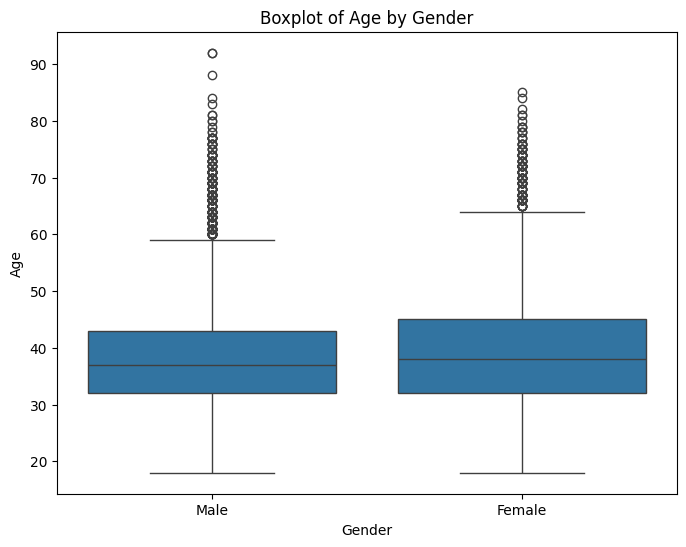

In [58]:
#boxplot for age vs gender
plt.figure(figsize=(8, 6))
plt.xticks(ticks=[0, 1], labels=['Male', 'Female'])
sns.boxplot(x=merged_dataset['Gender'], y=merged_dataset['Age'])
plt.title('Boxplot of Age by Gender')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.show()

In [66]:
#chi-squared test 1
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(merged_dataset['Gender'], merged_dataset['IsActiveMember'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-Square Statistic: {chi2}")
print(f"P-Value: {p}")


Chi-Square Statistic: 4.992271810534193
P-Value: 0.02546076070719631


In [73]:
#contingency table
contingency_table = pd.crosstab(merged_dataset['IsActiveMember'], merged_dataset['Exited'])
print(contingency_table)

Exited             0     1
IsActiveMember            
0               3547  1302
1               4416   735
